# 9. Clustering and k-means algorithm

## Simple clustering example

So far we have been looking only at supervised learning problems, where the training data consists of previously labeled samples. For these samples, the correct value of the target variable is known from the start. However, it is also possible to do meaningful machine learning even when pre-labelled samples are not available. A very common example of such **unsupervised learning** is that of **clustering**: in clustering problems, there exists a training set containing samples with a number of variables, but no particular "target variable" to make predictions about. Instead, we ask the following question: is it possible to divide the samples in subgroups in such a way that the samples in one of them are "closely related" to each other, but "distant" from those in other subgroups? Such questions arise very naturally *e.g.* in the fields of market segmentation or targeted advertising. 

As a simple example, let us use once more the familiar iris dataset: 

In [3]:
from sklearn.datasets import load_iris

X, y = load_iris(return_X_y=True)

However, this time we shall ignore the target values, and focus our attention to the values of the four numerical variables for each sample (contained in the array `X`). Let us also assume that we expect there to be three distinct species of flowers in the dataset, and we would like to identify them out automatically. That is, we ask whether the samples in the dataset naturally fall into three subgroups according to their variable values. This is an example of a clustering problem.

One of the most commonly used algorithm for finding the desired subdivision is the **k-means algorithm**. Implementing k-means clustering in Scikit-learn is straightforward: essentially, only the desired number of clusters k (the parameter `n_clusters` below) needs to be specified.   

In [4]:
from sklearn.cluster import KMeans

model = KMeans(init='random', n_clusters=3, random_state=42)
model.fit(X)

KMeans(init='random', n_clusters=3, random_state=42)

After the model has been trained, we can find the cluster labels of the training samples as follows:

In [5]:
labels = model.labels_
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

After clustering, each of the 150 training samples are assigned to one of three possible clusters labelled either 0, 1, or 2. Recall that the training set is arranged so that the first 50 samples are of type "setosa", next 50 "versicolor", and the last 50 "virginica". Let us compare the clustering results to that of species values: 

In [6]:
print('Class setosa:', labels[:50])
print('Class versicolor:', labels[50:100])
print('Class virginica:', labels[100:])

Class setosa: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]
Class versicolor: [1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1]
Class virginica: [2 1 2 2 2 2 1 2 2 2 2 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2
 2 1 2 2 2 1 2 2 2 1 2 2 1]


We find that all the samples of class setosa (and those only) really ended up in the same cluster. In the other two classes there is some mixing, but this simple clustering exercise was able to place the different flower samples in three classes according to their identity with quite reasonable success. Next, we take a closer look at how the k-means clustering actually works.

## K-means algorithm

Consider a training set with $N$ samples, each characterized by their $M$ separate variable values $x_{1}^{(i)}, x_{2}^{(i)}, ..., x_{M}^{(i)}$, $i = 1,...,N$; in our iris example, $N = 150$ and $M = 4$. K-means clustering involves a single hyperparameter $k$: the number of clusters the training set samples are subdivided into. The algorithm proceeds to find this cluster division as follows:

1) First, $k$ **means/cluster centers/centroids** are **initialized**. Each centroid is a point in the same $M$-dimensional space as the training data samples, with coordinates $m_{1}^{(j)}, m_{2}^{(j)}, ..., m_{M}^{(j)}$, $j = 1,...,k$. Often the cluster centroids are initialized randomly: their coordinate values might e.g. be taken to coincide with those of $k$ randomly selected samples from the training set.

2) Next, each sample is **assigned** to the cluster whose centroid is nearest to it. For this purpose, the Euclidean distance (see module 3) is usually used. For each sample denoted by index $i$, the distance to each of the $k$ clusters is computed with the expression 
$$
d^{(i,j)} = \sqrt{(x_{1}^{(i)}-m_{1}^{(j)})^{2}+...+(x_{M}^{(i)}-m_{M}^{(j)})^{2}}, \hspace{5mm} j=1,...,k 
$$ 
and each sample is assigned to the cluster whose centroid has the shortest distance to it.

3) After the assignment step has been completed, the cluster centroids are **updated**. The most common strategy for updating the centroids is to take the *averages* of the coordinate values of the individual samples assigned to that particular cluster. Consider, e.g. that $N_{j}$ samples have been assigned to a cluster with index $j$; in that case, the updated value for the first coordinate $m_{1}^{(j)}$ for that centroid is calculated as (the sum is taken over the samples assigned to cluster j)
$$
m_{1}^{(j)} = \frac{1}{N_{j}}\sum_{i=1}^{N_j} x_{1}^{(i)},
$$
and similarly for all the other $M-1$ coordinates.

4) The two previous steps (assignment + update) are **repeated** until the algorithm has converged, and the cluster assignments no longer change.

The cost function for the k-means clustering problem is the sum of squared distances for each sample to its assigned cluster center; this is also sometimes referred to as *inertia*. This problem, however, is computationally hard (NP-hard), and the k-means algorithm is not guaranteed to solve it: the converged solution is not necessarily the optimal one. Furthermore, the final solution may also depend on the initialization. Sometimes it may be necessary, therefore, to run the algorithm several times with different random initializations.

After the clustering is completed, the variable/coordinate values of the final cluster centers (the "k means") can be accessed as follows:  

In [10]:
model.cluster_centers_ 

array([[5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

These centroids can be thought as representative average members of the cluster they are related to; they provide information about the distribution of variables that has led to the observed clustering. In the example above, the cluster labeled 0 clearly is distinguished from the other two by the small numerical values of variables 2 and 3 (petal length and petal width) of its members.

Finally, the trained model can be used to assign cluster labels to any collection of new samples as well. In the code cell below, this is done for a small slice of the training data, just to provide an example:

In [6]:
model.predict(X[-10:])

array([2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

## Performance evaluation and selecting k

Next we turn to the question of evaluating the clustering results. In supervised learning, there are no target labels to compare the clusters with, so the evaluation process needs to be approached in a different manner. Also, in the k-means algorithm the number of clusters needs to be chosen in advance, and the correct value for this choice is not necessarily always available. We need some ideas for choosing the optimal k, and also for assessing the usefulness of the obtained results.  

The most obvious measure for the quality of clustering is the inertia (or within-cluster sum of squared distances, WCSS), which the k-means algorithm attempts to minimize. In the code cell below, the iris dataset is clustered with different values of k, and the corresponding inertia values are plotted against k: 

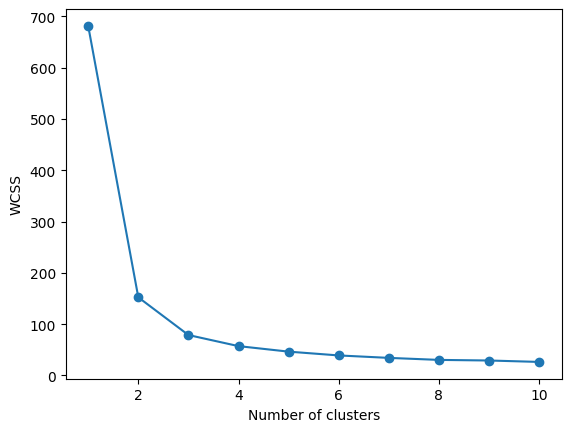

In [14]:
import matplotlib.pyplot as plt

wcss = []
for i in range(1,11):
    model = KMeans(init='random', n_clusters=i, random_state=42).fit(X)
    wcss.append(model.inertia_)
    
plt.plot(range(1,11), wcss, 'o-')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Note that the above plot exhibits the characteristic appearance of an "elbow": for small k the inertia decreases rapidly, but above a certain value of k the inertia decreases only quite slowly. The optimal values for k are usually found near the elbow, which in the above example appears to be located at k=3. This procedure is referred to as **the elbow method**, and is fairly often used to select the optimal value for k. 

The obvious problem with using inertia for measuring the quality of clusters is that it is not normalized: it is only useful for comparing results from different modelling attempts with each other. Another popular measure for cluster assessment is the **Silhouette Coefficient** $s$, which for a single sample is defined as

$$
s = \frac{b-a}{{\rm max}(a,b)}
$$
where $a$ is the mean distance from the sample to all the other samples in the same cluster, and $b$ is the mean distance from the sample to all the other samples in the next nearest cluster. For the entire set, the Silhouette Coefficient is defined as the mean value of $s$ for all the samples in it. From the definition, $-1 \le s \le 1$.

The Silhouette Coefficient is easily interpreted: the clustering for a sample is appropriate if $a \ll b$, or if $s$ is close to 1, inappropriate if $s$ is close to -1, and on the borderline if $s$ is close to zero. Below we study its value for our example problem:

In [19]:
from sklearn.metrics import silhouette_score

model = KMeans(init='random', n_clusters=3, random_state=42).fit(X)
labels = model.labels_
print('Silhouette score = %.2f' % silhouette_score(X, labels))

Silhouette score = 0.55


This particular score indicates that the clustering results are not exceptionally strong, but they can still be considered reasonable.

## Hierarchical clustering

K-means is a very popular clustering algorithm because of its simplicity, efficiency, and robustness. However, it has its shortcomings, one of which is the need to specify the number of clusters in advance, as discussed above. Also, k-means is known to be quite sensitive to outliers in the training data.

As another alternative example of clustering algorithms, we take a brief look at **hierarchical clustering**. Actually, this is really a family of fairly similar algorithms, of which we look at one specific example. Hierarchical clustering for a dataset with N samples might be implemented as follows:

- In the beginning, there are N clusters, each having one of the samples as its only member and centroid.
- Next, the (Euclidean) distances between the centroids of all cluster pairs are calculated, and the two clusters nearest each other are joined to form a new cluster containing the samples in them. As a result, the number of clusters decreases by one.
- The centroid of the new cluster formed in the previous step is calculated as the average of all the samples it contains.
- The last two steps are repeated, until all the samples are in the same cluster (the number of clusters is reduced to 1).  

The procedure above is an example of **agglomerative** hierarchical clustering: the number of clusters decreases from N to 1. It is also possible to perform hierarchical clustering in a **divisive** manner: starting with one cluster, and breaking it up into smaller clusters. 

After executing this algorithm, intermediate clustering results become available for any number of clusters. Therefore, it is not necessary to know k in advance, which is an advantage: it is possible to choose the one with optimal properties, such as one having well-separated and dense collections or data samples. This, however, comes with a cost of extensive computational labor: hierarchical clustering involves $O(N^3)$ mathematical operations for completion. Therefore, the preferred solution often is to run k-means clustering with several different values of k instead, compare the results, and select the optimal one for the purpose.  